# Introduction to Data Exploration
**Learning Objective:** 
- Learn to load a dataset
- Learn to explore and visualise variables
- Get familiar with common variable exploration functions

## The Data Science Pipeline

![](https://mickaeltemporao.github.io/itds/images/pipeline.jpg)

## Data Acquisition
With some Python basics we will start combining existing packages to acquire, and explore data.


Before we can start looking into data, we need to load data into our machines.



In [4]:
# Load the required libraries
import pandas as pd
# Let's load real-world data with pandas
data_url = "https://raw.githubusercontent.com/datamisc/ts-2020/main/data.csv"
anes_data  = pd.read_csv(data_url, compression='gzip')


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (15,17,18,19,21,22,23,25,26,27,29,30,31,33,34,35,37,38,1508,1509) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### Hack-Time

In [5]:
# What is the type of anes_data?


### Data Frames

Data Frames are lists (or series when using pandas) that are put together in a table.

![](https://storage.googleapis.com/lds-media/images/series-and-dataframe.width-1200.png)

In [6]:
# A quick example

turnout = [66.8, 55.7, 54.9, 58.2, 56.7, 51.2, 49.0]
year = [2020, 2016, 2012, 2008, 2004, 2000, 1996]
party = ["Dem", "Rep", "Dem", "Dem", "Rep", "Rep", "Dem"]

# We are creating a data frame from scratch
my_data = pd.DataFrame(
    {
        'turnout': turnout,
        'year': year,
        'party': party,
    }
)


In [7]:
# What is the type of `my_data`
type(my_data)


pandas.core.frame.DataFrame

In [8]:
# Take a look at new dataset you just created
my_data


,turnout,year,party
0,66.8,2020,Dem
1,55.7,2016,Rep
2,54.9,2012,Dem
3,58.2,2008,Dem
4,56.7,2004,Rep
5,51.2,2000,Rep
6,49.0,1996,Dem


In [9]:
# We can also learn more about our object by using the `.info()` method.
my_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   turnout  7 non-null      float64
 1   year     7 non-null      int64  
 2   party    7 non-null      object 
dtypes: float64(1), int64(1), object(1)
memory usage: 296.0+ bytes


In [10]:
# When your dataset is too long might just want to print the first couple 
# observations (rows) by using the `.head()` method.
my_data.head()


,turnout,year,party
0,66.8,2020,Dem
1,55.7,2016,Rep
2,54.9,2012,Dem
3,58.2,2008,Dem
4,56.7,2004,Rep


### Hack-Time

In [11]:
# Take a look at the head of the ANES data


In [12]:
# Take a look at the info of the ANES data


## Data Exploration - Variables

Now that you have your data, the next step is to get familiar with it. 

Most of the time you are interested in some specific concepts. 
- You need a way to only select the variables related to your concepts.


### Selecting Variables (Columns)

Let's say you want to explore the vote of us citizens (V201033).

- We can use square brackets on a DataFrame object to select a single column!
- We can also use a list of strings containing column namesto select multiple columns!

![](https://pandas.pydata.org/docs/_images/03_subset_columns.svg)


In [13]:
# The `columns` attribute allows you to get the column names of a dataframe
anes_data.columns

Index(['version', 'V200001', 'V160001_orig', 'V200002', 'V200003', 'V200004',
       'V200005', 'V200006', 'V200007', 'V200008',
       ...
       'V203518', 'V203519', 'V203520', 'V203521', 'V203522', 'V203523',
       'V203524', 'V203525', 'V203526', 'V203527'],
      dtype='object', length=1771)

In [14]:
# Selecting the voting intent variable
anes_data["V201033"]


0       2
1       3
2       1
3       1
4       2
       ..
8275    2
8276    2
8277    1
8278   -1
8279    1
Name: V201033, Length: 8280, dtype: int64

In [15]:
# We can also save it in a new object and check it's type
vote_int = anes_data["V201033"]
type(vote_int)


pandas.core.series.Series

Let's say know you want to also learn who people intend to vote for as a function of their age and ideology? In this case you might need to select multiple variables.

In [16]:
# Selecting multiple columns
my_vars = [
    "V201032",  # intend to vote
    "V201033",  # intend to vote for
    "V201507x",  # age
    "V201200",  # liberal-conservative self-placement
]

anes_data[my_vars]

,V201032,V201033,V201507x,V201200
0,1,2,46,6
1,1,3,37,4
2,1,1,40,2
3,1,1,41,3
4,1,2,72,5
...,...,...,...,...
8275,1,2,26,99
8276,1,2,52,6
8277,1,1,45,4
8278,-1,-1,65,6


In [55]:
# Save this smaller subset of variables into my_df
my_df = anes_data[my_vars]
print(type(my_df))
print(my_df.columns)
my_df.head()

<class 'pandas.core.frame.DataFrame'>
Index(['V201032', 'V201033', 'V201507x', 'V201200'], dtype='object')


,V201032,V201033,V201507x,V201200
0,1,2,46,6
1,1,3,37,4
2,1,1,40,2
3,1,1,41,3
4,1,2,72,5


To avoid always having to check the codebook let's clean our data a bit by making the column names more explicit.

In [56]:
# Renaming the columns
my_df.columns = ["vote", "vote_int", "age", "ideology"]
my_df.head()

,vote,vote_int,age,ideology
0,1,2,46,6
1,1,3,37,4
2,1,1,40,2
3,1,1,41,3
4,1,2,72,5


### Useful Methods
Series and Data Frames provide very useful methods to quickly learn about the data. Here a some common ones

- `mean()`
- `std()`
- `min()`
- `max()`
- `count()`
- `describe()`
- `value_counts()`


In [57]:
# How many people indent to vote?
my_df["vote"].value_counts()


 1    7272
 2     570
-1     415
-9      13
-8      10
Name: vote, dtype: int64

In [58]:
# What percentage of people intend to vote? 
my_df["vote"].value_counts(normalize=True)


 1    0.878261
 2    0.068841
-1    0.050121
-9    0.001570
-8    0.001208
Name: vote, dtype: float64

In [59]:
# A little cleaner
my_results = my_df["vote"].value_counts(normalize=True) * 100
my_results.round(1)


 1    87.8
 2     6.9
-1     5.0
-9     0.2
-8     0.1
Name: vote, dtype: float64

### Hack-Time

In [60]:
# What is the average age of the respodents in the ANES dataset?


In [61]:
# What is the average ideology of the respondents in the ANES dataset?


In [62]:
# What is the proportion of people who intend to vote for each D. Trump?


## Data Visualisation

Once you have found some information that you need. It is usually a good idea to plot your results. As sometimes, a visualisation will help you better understand the problems in your data!

Most of the times you will use bar plots and histograms to visualise a single variable, depending on its type.

### Types of data

We have seen that there are different types of data in python (strings, integers, floats, booleans, ...). When doing research we can group data in two broad families:

**Continuous** data can take an infinite number of values.
- The height of a student (eg. 182.5 cm)
- For these variables you will usually use **histograms**.

**Discrete** data can only take a finite number of values.
- The number of students in a class (eg. 22)
- For these variables you will usually use **bar plots**.
- **Don't forget to summarise your data before plotting!**
    - Otherwise your computer won't be happy...

### Pandas Plotting API

You can use pandas to plot your results using the `.plot()` method on a DataFrame or Series object.

For more information click [**here**](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html).


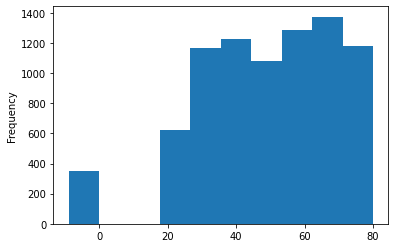

In [63]:
# Let's plot the distribution of the vote variable.
my_df["age"].plot(kind="hist")



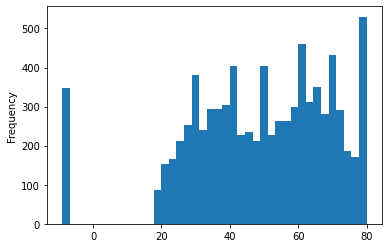

In [69]:
# Digging Deeper
my_df["age"].plot(kind="hist", bins=40)



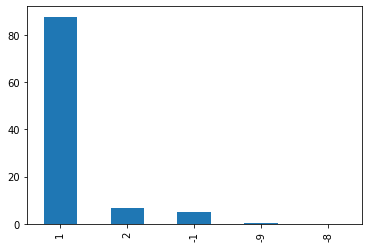

In [65]:
# Let's look at participation
my_results.plot(kind="bar")


### Hack-Time

In [66]:
# Are US citizens polarized? 


In [67]:
# Who would win the popular vote according to the ANES 2020?


### Going further

There are many options to play with and improve a figure. 
When you are looking for help to change something on a figure, if you have the right terminology it is quite easy to find help!

#### Anatomy of a Figure
![Anatomy of a Figure](https://matplotlib.org/3.1.1/_images/anatomy.png)

Let's try to improve our voting intentions plot a tiny bit.

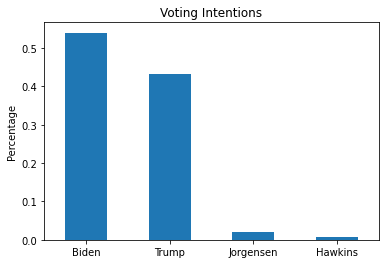

In [97]:
# Filtering Observations (for next time)
mask = my_df['vote_int'].between(1,4)

# Summarizing the data
tmp_data = my_df.loc[mask,"vote_int"].replace(
    {1:"Biden", 2:"Trump", 3:"Jorgensen", 4:"Hawkins"}
).value_counts(
    normalize=True
)

# Making a plot/graphic/figure
tmp_data.plot(
    kind="bar",
    title="Voting Intentions", 
    ylabel="Percentage",
    rot=0,
);


In [101]:
tmp_data

Biden        53.985351
Trump        43.314663
Jorgensen     1.910096
Hawkins       0.789889
Name: vote_int, dtype: float64

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


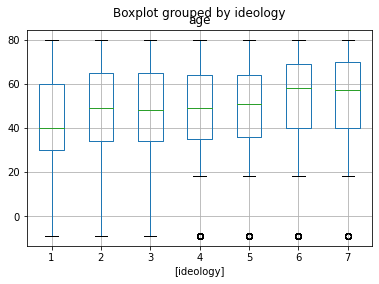

In [114]:
# Is there a relationship between Age and Ideology? 
my_vars = ['age', 'ideology']
mask = my_df['ideology'].between(1,7)
my_df.loc[mask, my_vars].boxplot(by='ideology')
